<a href="https://colab.research.google.com/github/Redwolf0023/AutoMLvsBayesian/blob/main/Diabetes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# download and install the dependencies
!sudo apt-get install swig -y
!pip install Cython numpy
!pip install scikit-learn
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 16 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,221 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline


In [ ]:
#import the libraires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# import input file as a dataset
df = pd.read_csv('diabetes-vid.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [ ]:
# encode the target variable
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Outcome'] = LE.fit_transform(df['Outcome'])

In [ ]:
# initialise the cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 26 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_unknownUser_2wueh9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.156 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# parse the dataset
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target_col = data.columns[-1]
feature_col = data.columns[:-1]
data[target_col] = data[target_col].asfactor()

In [ ]:
train, test, validation = data.split_frame(ratios=[0.8, 0.15], seed = 12)

In [ ]:
# initialise and train the H2O model
model = H2OAutoML(max_models=20, seed = 1234)
model.train(x = feature_col, y = target_col, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_3_20230819_174315,0.882447,0.422365,0.807195,0.187633,0.370731,0.137442,59,0.053675,GLM
GBM_3_AutoML_3_20230819_174315,0.867553,0.447215,0.717273,0.184441,0.383493,0.147067,136,0.110218,GBM
XGBoost_grid_1_AutoML_3_20230819_174315_model_2,0.867021,0.441566,0.711601,0.194415,0.380914,0.145096,259,0.207991,XGBoost
GBM_grid_1_AutoML_3_20230819_174315_model_2,0.863564,0.445603,0.708683,0.185106,0.3833,0.146919,74,0.06255,GBM
DeepLearning_grid_2_AutoML_3_20230819_174315_model_1,0.85984,0.452632,0.688258,0.178191,0.389443,0.151666,23583,0.071756,DeepLearning
GBM_1_AutoML_3_20230819_174315,0.858644,0.449677,0.737699,0.181915,0.386442,0.149338,106,0.137015,GBM
DeepLearning_grid_3_AutoML_3_20230819_174315_model_1,0.856915,0.44526,0.730142,0.19508,0.388156,0.150665,30689,0.154335,DeepLearning
XGBoost_1_AutoML_3_20230819_174315,0.855851,0.459128,0.737884,0.211303,0.391563,0.153321,559,0.050045,XGBoost
StackedEnsemble_AllModels_1_AutoML_3_20230819_174315,0.852128,0.454782,0.705977,0.203856,0.392315,0.153911,3752,0.770001,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_3_20230819_174315,0.845213,0.461416,0.70558,0.197606,0.395417,0.156355,2554,0.299831,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_3_20230819_174315

,0,1,Error,Rate
0,62.0,18.0,0.225,(18.0/80.0)
1,8.0,39.0,0.1702,(8.0/47.0)
Total,70.0,57.0,0.2047,(26.0/127.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

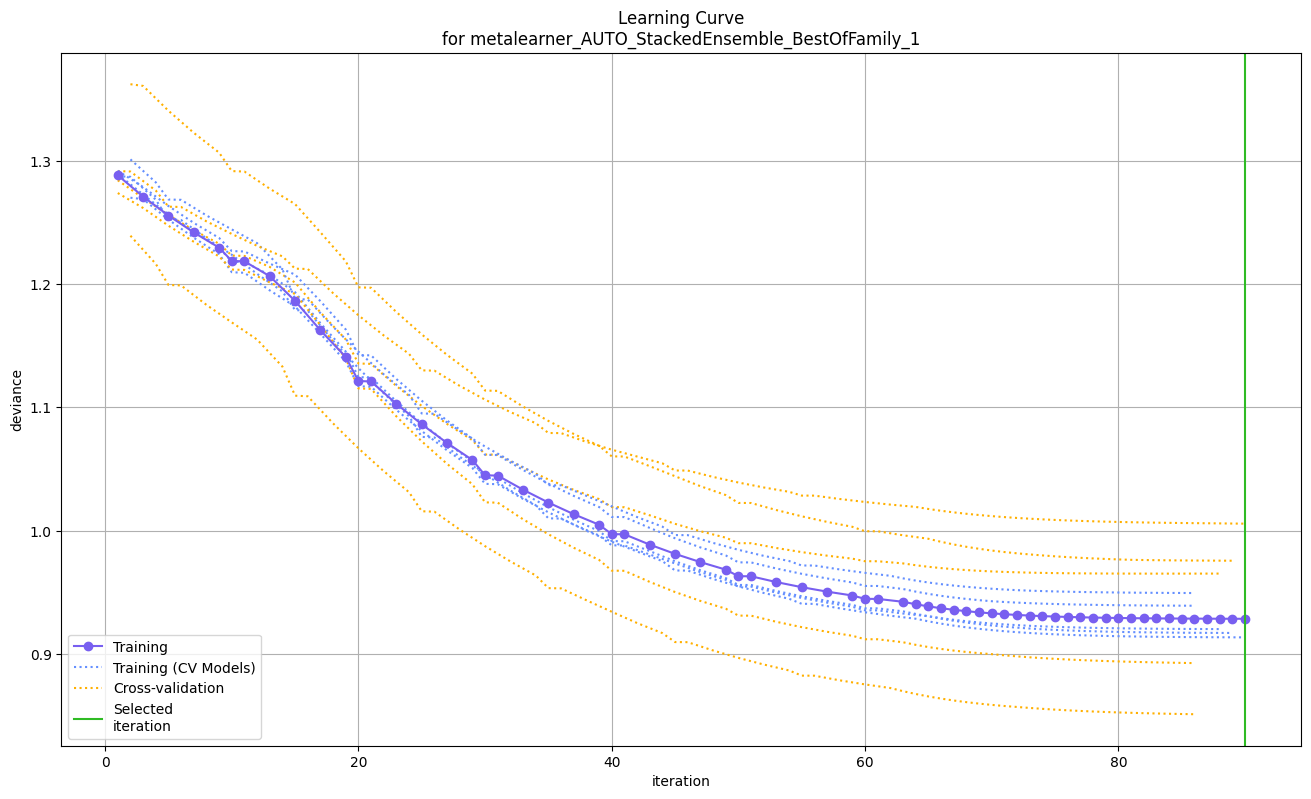

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

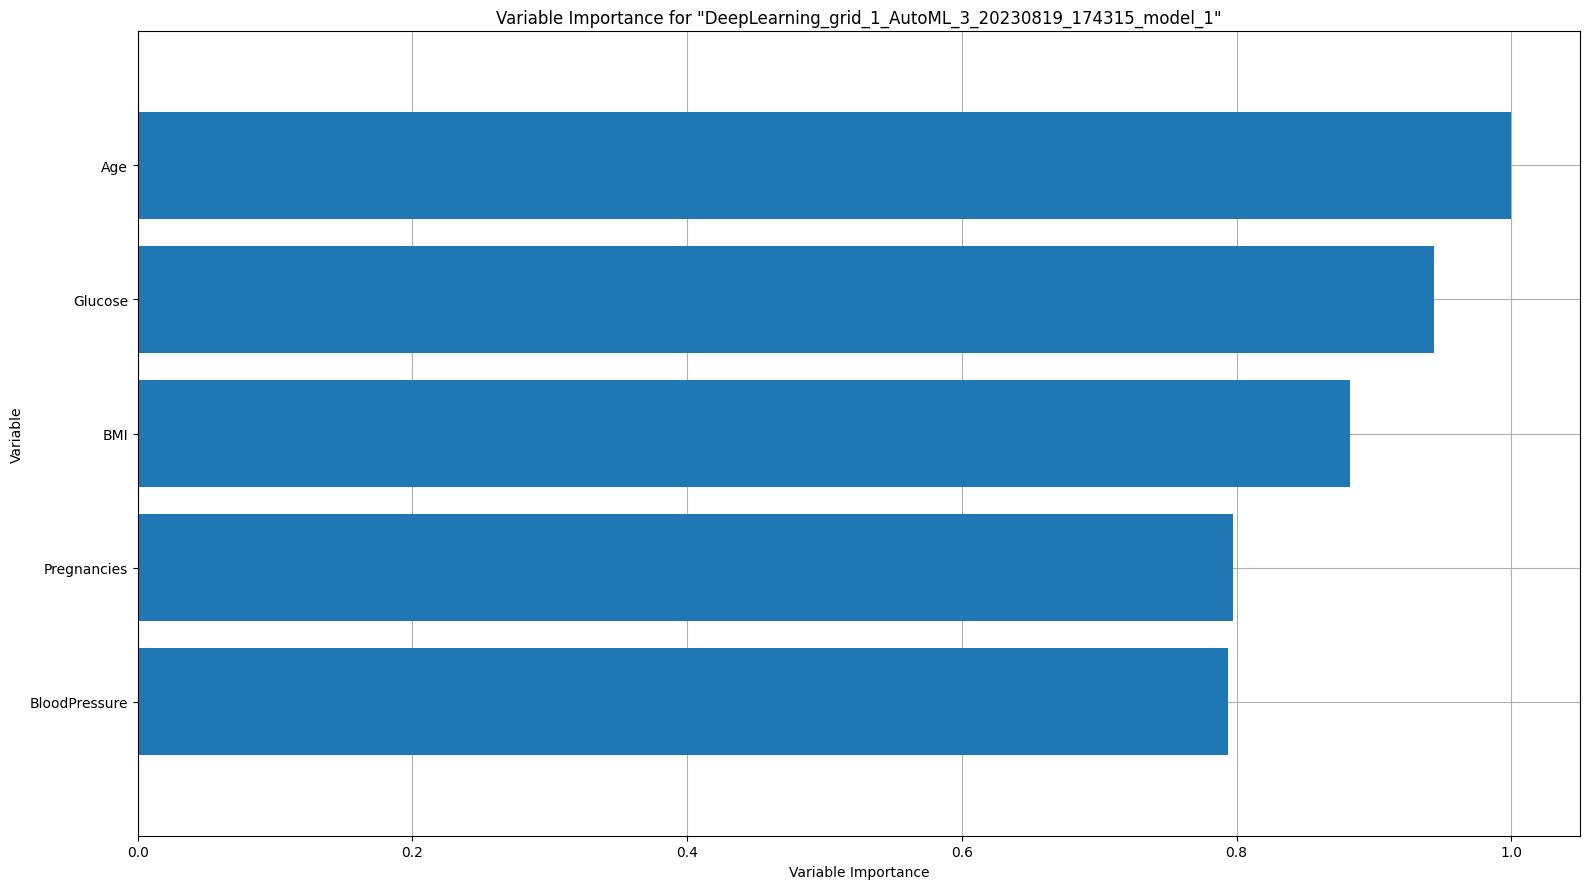

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

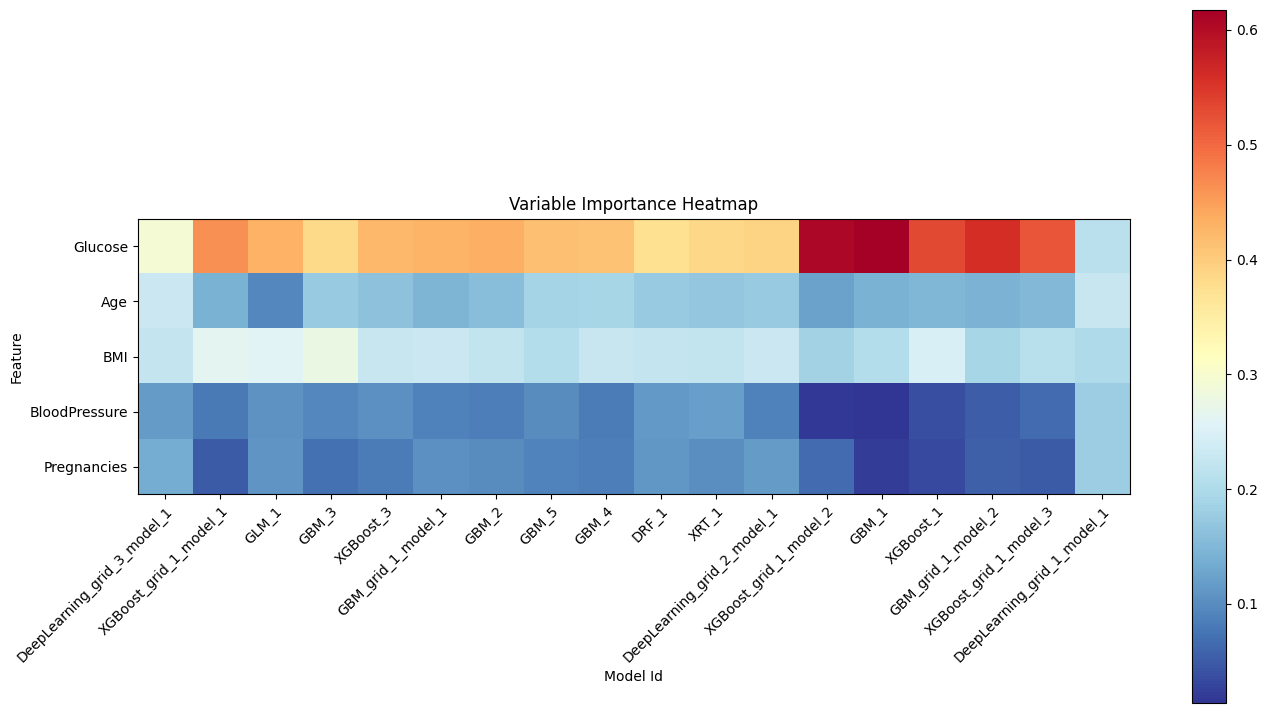

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

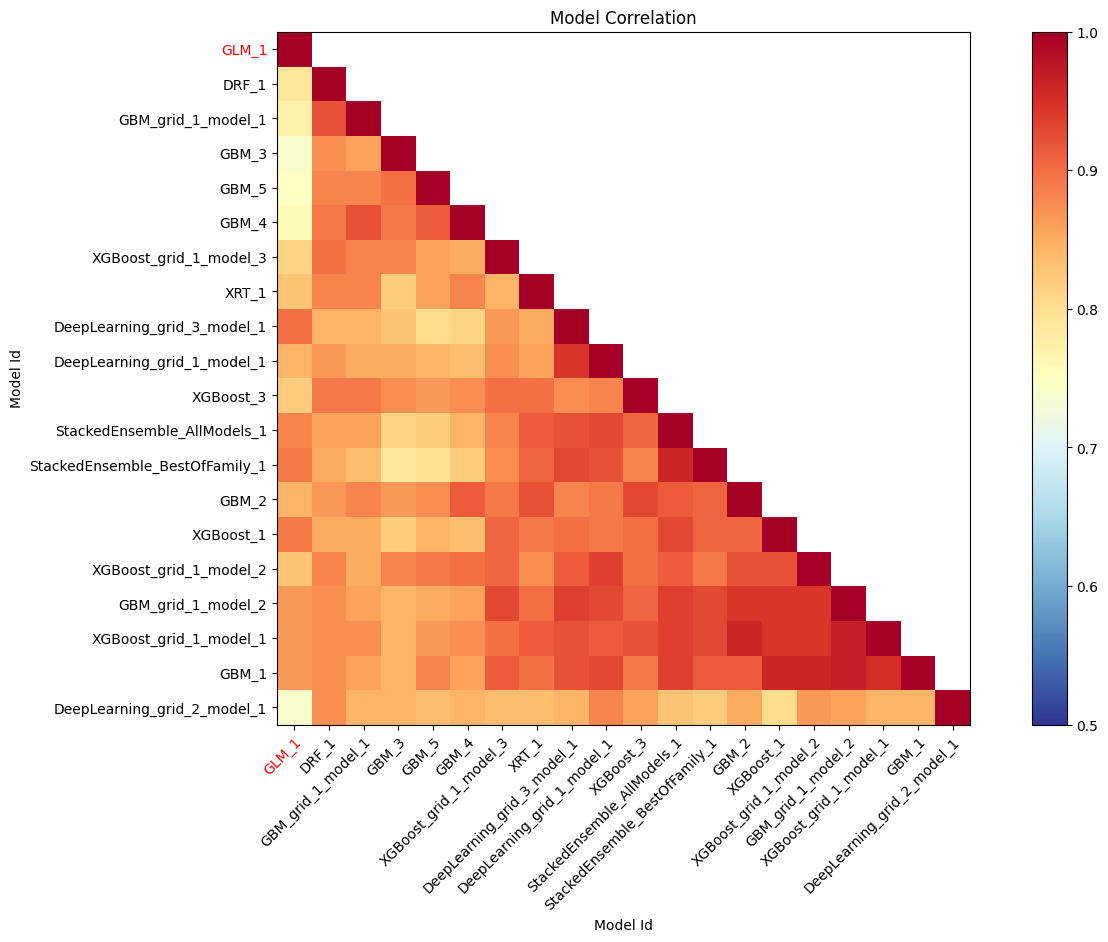

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

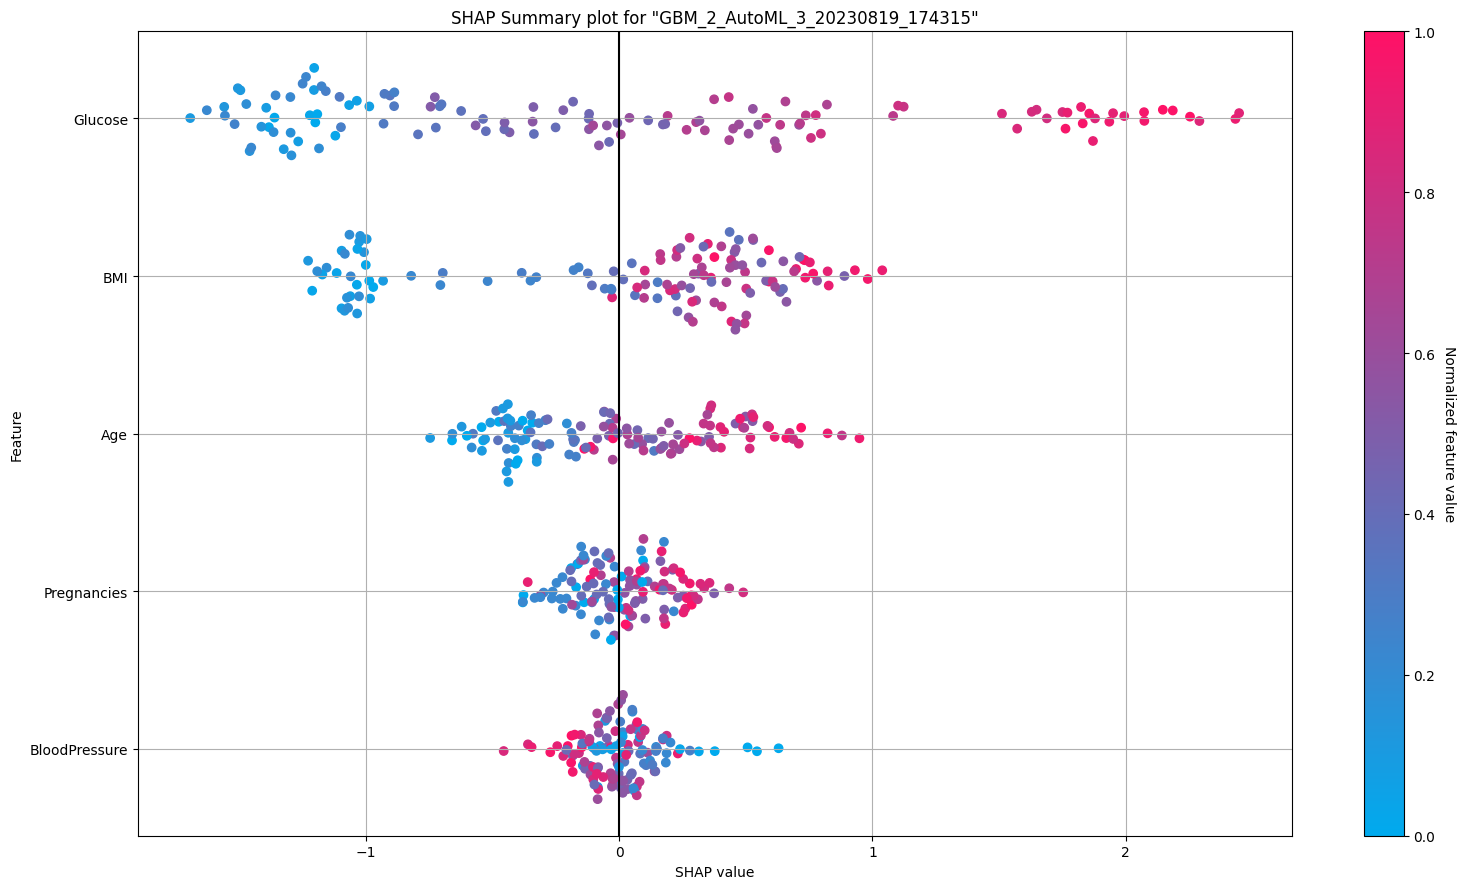

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

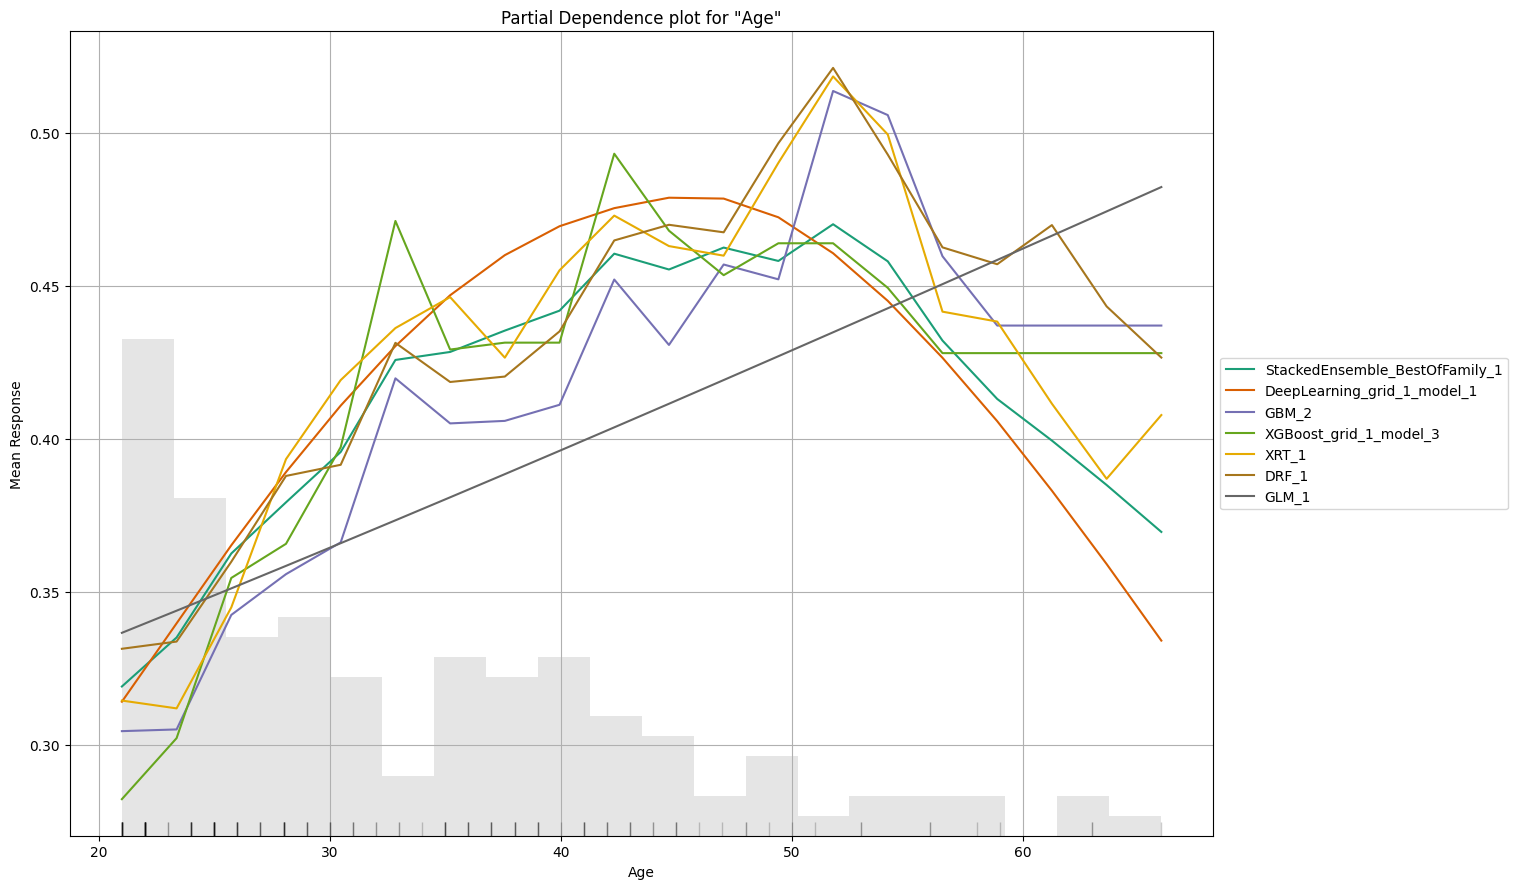

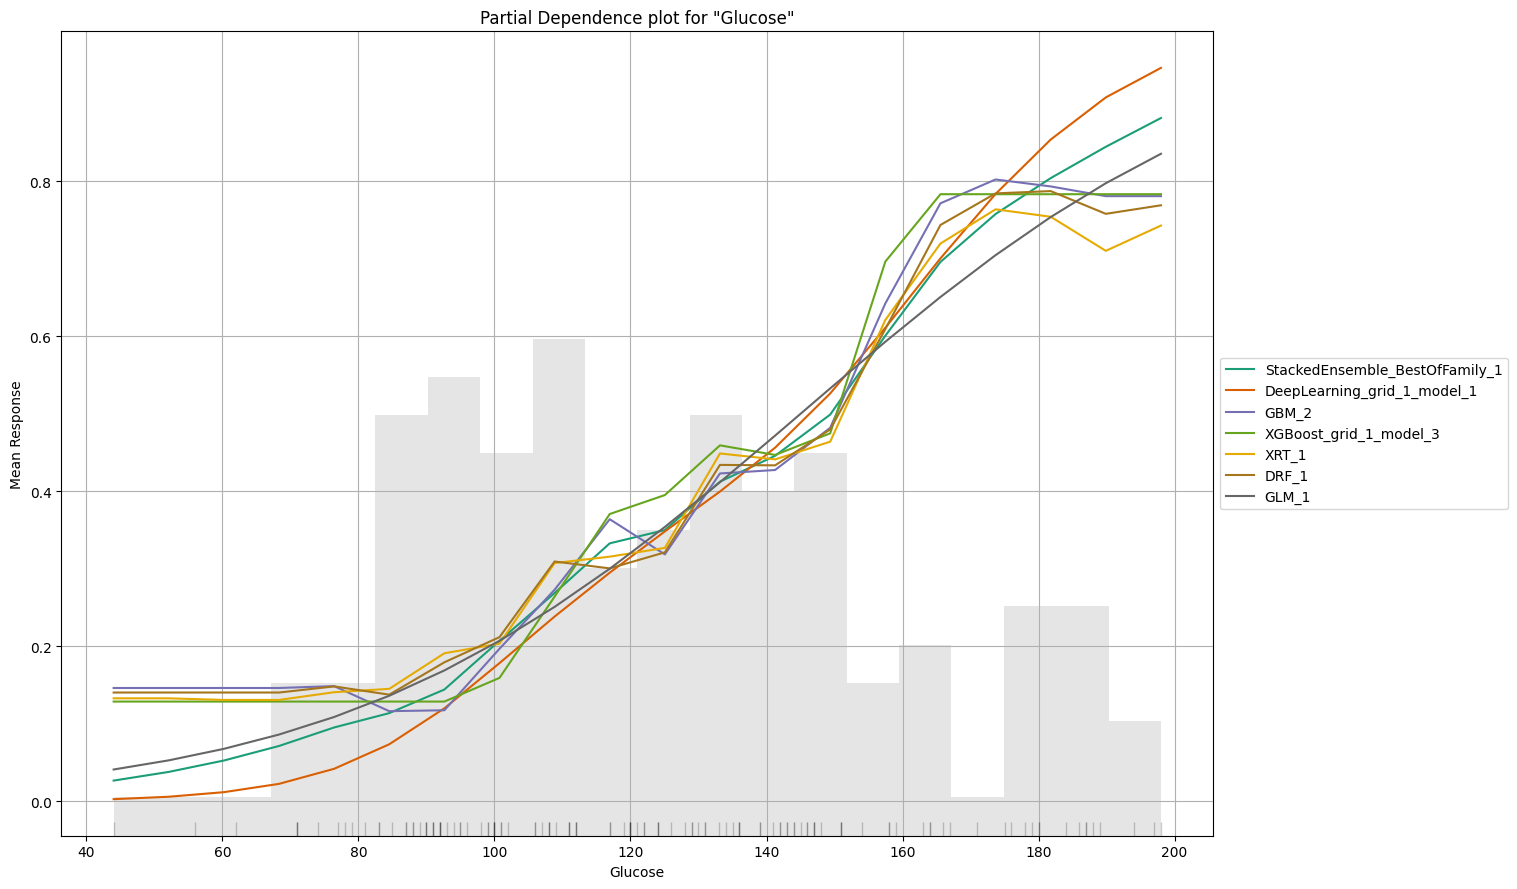

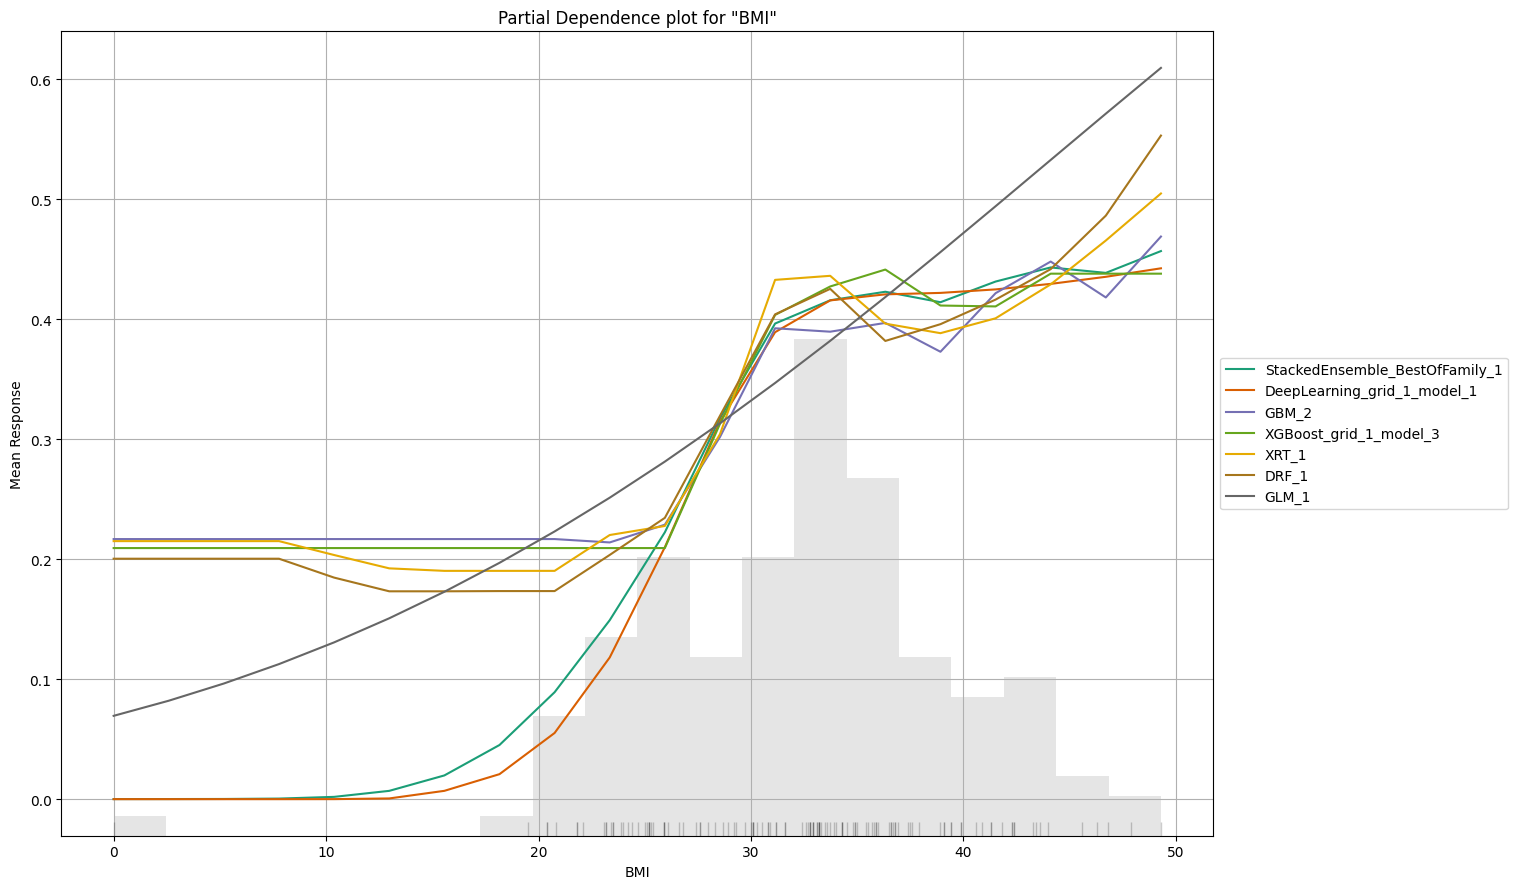

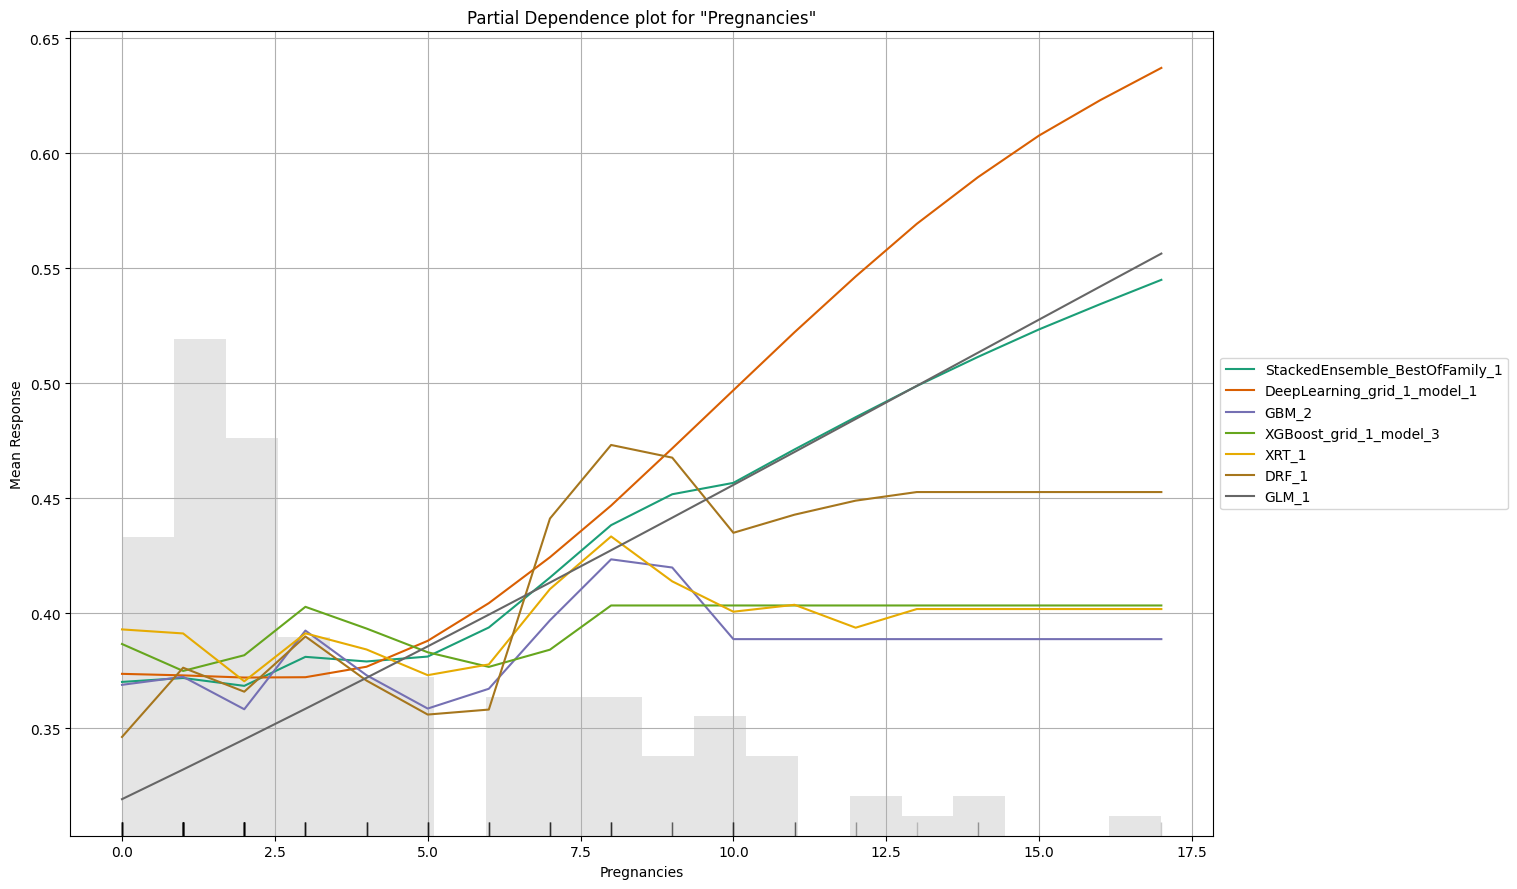

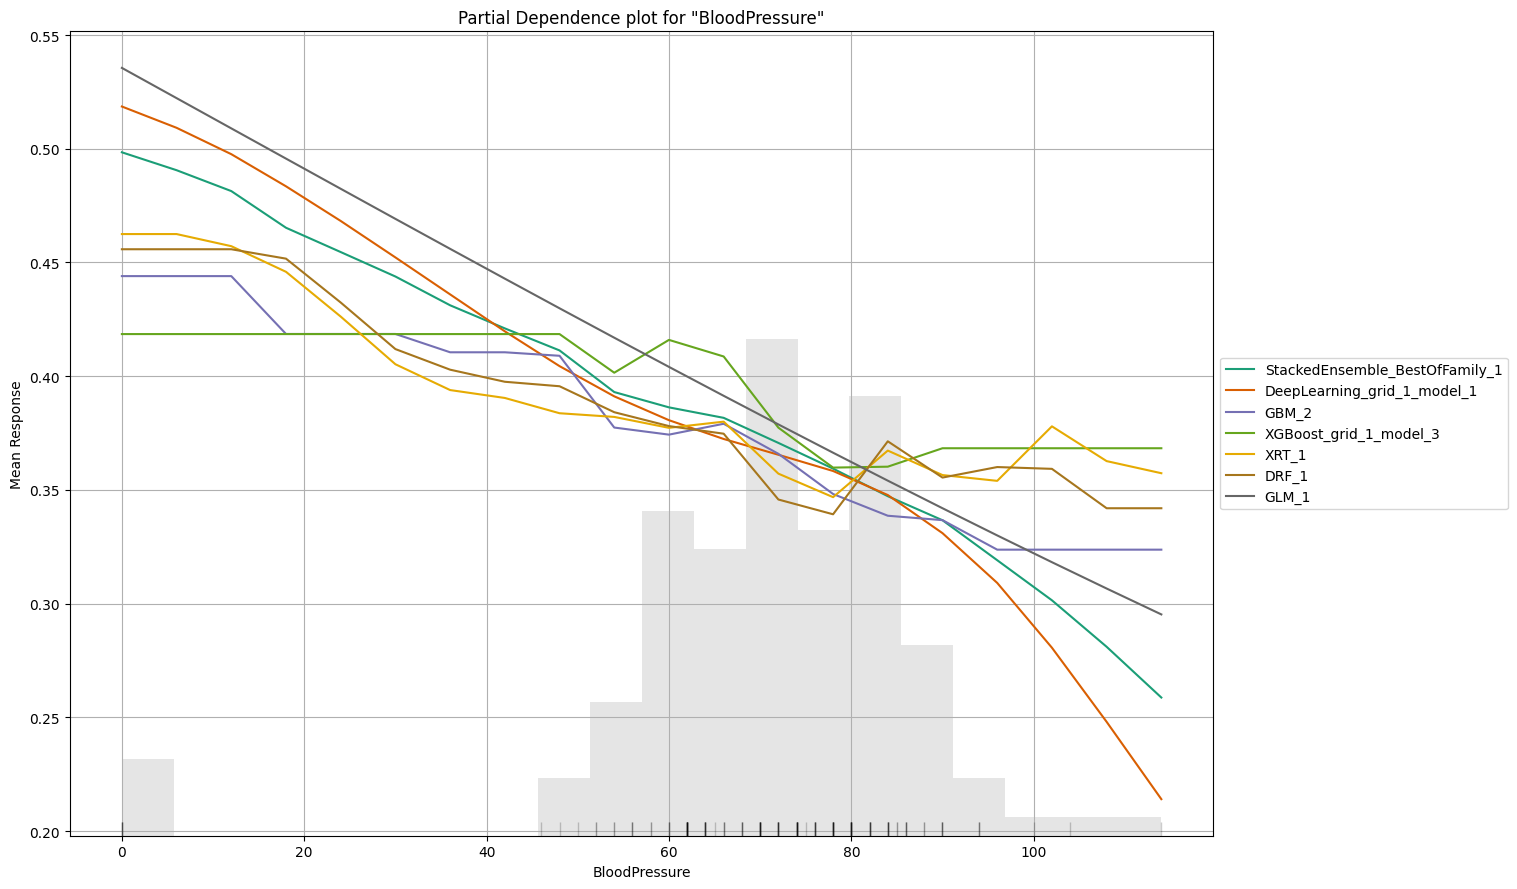

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_3_20230819_174315,0.882447,0.422365,0.807195,0.187633,0.370731,0.137442,59,0.053675,GLM
GBM_3_AutoML_3_20230819_174315,0.867553,0.447215,0.717273,0.184441,0.383493,0.147067,136,0.110218,GBM
XGBoost_grid_1_AutoML_3_20230819_174315_model_2,0.867021,0.441566,0.711601,0.194415,0.380914,0.145096,259,0.207991,XGBoost
GBM_grid_1_AutoML_3_20230819_174315_model_2,0.863564,0.445603,0.708683,0.185106,0.3833,0.146919,74,0.06255,GBM
DeepLearning_grid_2_AutoML_3_20230819_174315_model_1,0.85984,0.452632,0.688258,0.178191,0.389443,0.151666,23583,0.071756,DeepLearning
GBM_1_AutoML_3_20230819_174315,0.858644,0.449677,0.737699,0.181915,0.386442,0.149338,106,0.137015,GBM
DeepLearning_grid_3_AutoML_3_20230819_174315_model_1,0.856915,0.44526,0.730142,0.19508,0.388156,0.150665,30689,0.154335,DeepLearning
XGBoost_1_AutoML_3_20230819_174315,0.855851,0.459128,0.737884,0.211303,0.391563,0.153321,559,0.050045,XGBoost
StackedEnsemble_AllModels_1_AutoML_3_20230819_174315,0.852128,0.454782,0.705977,0.203856,0.392315,0.153911,3752,0.770001,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_3_20230819_174315,0.845213,0.461416,0.70558,0.197606,0.395417,0.156355,2554,0.299831,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_3_20230819_174315

,0,1,Error,Rate
0,62.0,18.0,0.225,(18.0/80.0)
1,8.0,39.0,0.1702,(8.0/47.0)
Total,70.0,57.0,0.2047,(26.0/127.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [ ]:
# explain the model
exm = model.explain(test)
exm

In [ ]:
# import the libraries needed for Gaussian process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel, DotProduct, Matern,ExpSineSquared,WhiteKernel,RationalQuadratic
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, r2_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import roc_auc_score as ras

Text(0.5, 1.0, 'Heat Map')

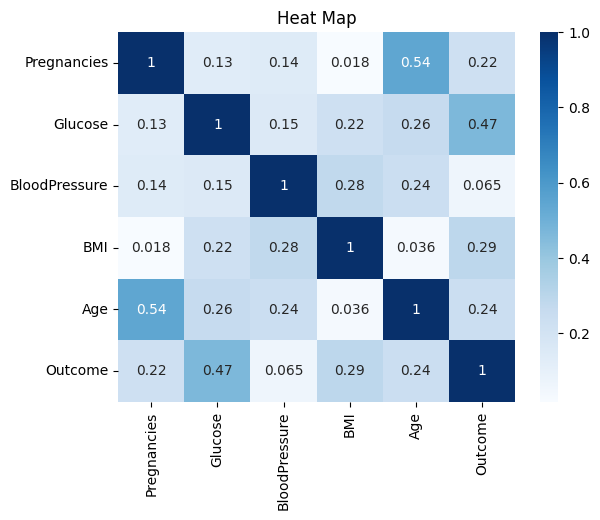

In [ ]:
# check for correlation
sns.heatmap(df.corr(),annot = True, cbar = True, cmap = 'Blues')
plt.title("Heat Map")

In [ ]:
df = df.drop(["DiabetesPedigreeFunction","Insulin","SkinThickness"], axis=1)

In [ ]:
x = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [ ]:
# standardize the feature column
from sklearn import preprocessing
SS = preprocessing.StandardScaler()
x = SS.fit_transform(x)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 5), (154, 5), (614,), (154,))

In [ ]:

# Initialize the Gaussian Process Regressor using RationalQuadratic kernel
kernel = 1.0* RationalQuadratic(length_scale=1.0, alpha=1.0)
gp = GaussianProcessRegressor(kernel=kernel, alpha=5e-9, optimizer='fmin_l_bfgs_b',
                                n_restarts_optimizer=0, normalize_y=False, copy_X_train=True,
                                random_state=20)

# Train the Gaussian Process Regressor
gp.fit(x_train, y_train)

# Make predictions on the test set
predictions = gp.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, predictions)

# Print the calculated metrics

print(f"R2 Score: {r2}")

Mean Squared Error: 0.1617414970526195
R2 Score: 0.29552592394859034


In [ ]:
binary_predictions = (predictions >= 0.5).astype(int)

accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
roc_auc = ras(y_test, predictions)  # Use continuous predictions for AUC-ROC

conf_matrix = confusion_matrix(y_test, binary_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)





Accuracy: 0.7532467532467533
Precision: 0.660377358490566
Recall: 0.6363636363636364
F1-Score: 0.6481481481481481
AUC-ROC: 0.8244260789715334
Confusion Matrix:
[[81 18]
 [20 35]]
